In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
import numpy as np
import statsmodels.stats.multitest as smm

## Statistische Analyse der Evaluierungsergebnisse
Um die Leistungen der drei Modelle anhand der fünf festgelegten Bewertungskriterien auszuwerten, werden verschiedene analytische Schritte durchgeführt. Zunächst werden deskriptive Statistiken wie Durchschnittswerte berechnet.

### Berechnung der Durchschnittswerte


In [2]:
# Load the evaluated dataset
evaluated_samples = pd.read_csv('../data/evaluation/counterspeech_90_samples_evaluated.csv', delimiter=';', quotechar='"')

# Drop the 'comment_id' column as it is not needed for the evaluation
evaluated_samples = evaluated_samples.drop(columns=['comment_id'])

# Calculate the overall score for each sample by taking the mean of the criteria
evaluated_samples['overall_score'] = evaluated_samples[['empathy_factor', 'fidelity_to_facts', 'tone', 'clarity_of_argumentation', 'successful_use_of_storytelling']].mean(axis=1)

# Calculate the mean values for each criterion per model, ignoring NaN values
mean_values = evaluated_samples.groupby('model').mean(numeric_only=True).reset_index()

# Display the mean values and overall score for each model
mean_values.head()

,model,empathy_factor,fidelity_to_facts,tone,clarity_of_argumentation,successful_use_of_storytelling,overall_score
0,counter_speech_gpt-4o,4.466667,4.333333,4.933333,4.566667,3.586207,4.385000
1,counter_speech_llama3,4.566667,4.133333,4.900000,4.500000,3.947368,4.451667
2,counter_speech_mistral,4.000000,3.133333,4.500000,3.633333,3.280000,3.736667


### Berechnung der Standardabweichungen


In [3]:
# Calculate the standard deviations for each criterion per model, ignoring NaN values
std_deviations = evaluated_samples.groupby('model').std(numeric_only=True).reset_index()

# Display the standard deviations for each model
std_deviations.head()

,model,empathy_factor,fidelity_to_facts,tone,clarity_of_argumentation,successful_use_of_storytelling,overall_score
0,counter_speech_gpt-4o,0.507416,0.606478,0.365148,0.504007,0.732766,0.321406
1,counter_speech_llama3,0.504007,0.899553,0.305129,0.629724,0.705036,0.424768
2,counter_speech_mistral,0.643268,0.819307,0.776819,0.999425,1.242310,0.690943


### Visualisierung der Modellbewertungen
Ein Balkendiagramm mit Fehlerbalken wird verwendet, um die Leistungen der Modelle über die verschiedenen Bewertungskriterien hinweg zu visualisieren. Dieses Diagramm zeigt separate Balken für jedes der fünf Bewertungskriterien und jedes Modell, um sowohl die durchschnittlichen Bewertungen als auch deren Konsistenz mittels Fehlerbalken, die die Standardabweichungen repräsentieren, darzustellen. Geringe Standardabweichungen bedeuten, dass die Bewertungen über verschiedene Instanzen hinweg ähnlich waren und das Modell in diesem Kriterium stabil ist. Große Standardabweichungen deuten auf eine höhere Variabilität in den Bewertungen hin, was auf mögliche Schwächen in der Konsistenz des Modells hinweisen kann.

#### Erklärung der Elemente
- **Farben**: Jede Modelllinie ist in einer eigenen Farbe gehalten, um eine klare visuelle Unterscheidung zwischen den Modellen zu ermöglichen.
- **X-Achse**: Die X-Achse stellt die verschiedenen Bewertungskriterien dar.
- **Y-Achse**: Auf der Y-Achse werden die Bewertungsscores angezeigt, die jedes Modell erreicht hat.
- **Balken**: Jeder Balken repräsentiert die durchschnittliche Bewertung eines Modells für ein bestimmtes Kriterium.
- **Fehlerbalken**: Die vertikalen Linien über jedem Balken zeigen die Standardabweichung der Bewertungen, was auf die Variabilität in den Bewertungen hinweist.
- **Legende**: Die Legende klärt, welches Modell durch welche Farbe repräsentiert wird.

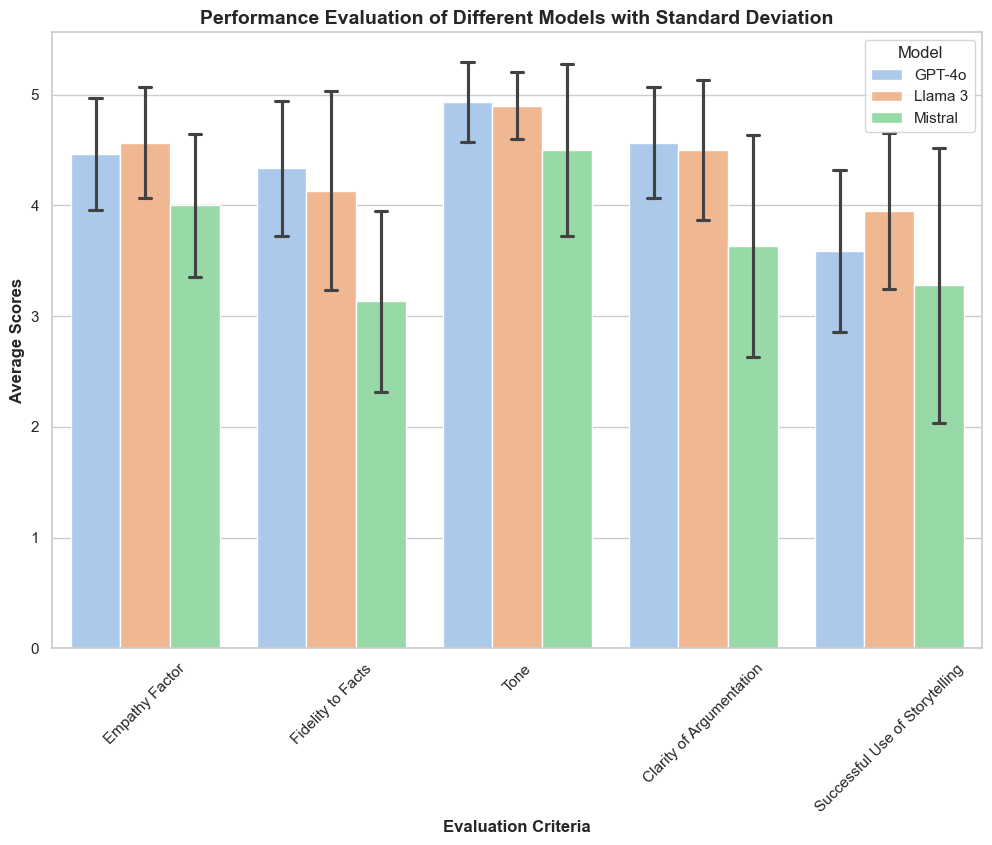

In [5]:
criteria_columns = ['empathy_factor', 'fidelity_to_facts', 'tone', 'clarity_of_argumentation', 'successful_use_of_storytelling']

# Prepare the data for plotting
data_melted = evaluated_samples.melt(id_vars=['model'], value_vars=criteria_columns, var_name='Criteria', value_name='Score')

# Mapping for model names and criteria labels
model_mapping = {
    'counter_speech_gpt-4o': 'GPT-4o',
    'counter_speech_llama3': 'Llama 3',
    'counter_speech_mistral': 'Mistral'
}

criteria_mapping = {
    'empathy_factor': 'Empathy Factor',
    'fidelity_to_facts': 'Fidelity to Facts',
    'tone': 'Tone',
    'clarity_of_argumentation': 'Clarity of Argumentation',
    'successful_use_of_storytelling': 'Successful Use of Storytelling'
}

# Apply the mappings
data_melted['model'] = data_melted['model'].map(model_mapping)
data_melted['Criteria'] = data_melted['Criteria'].map(criteria_mapping)

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a bar plot with error bars
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Criteria', y='Score', hue='model', data=data_melted, errorbar='sd', palette='pastel', capsize=.2)
plt.title('Performance Evaluation of Different Models with Standard Deviation', fontsize=14, fontweight='bold')
plt.ylabel('Average Scores', fontweight='bold')
plt.xlabel('Evaluation Criteria', fontweight='bold')
plt.legend(title='Model')
plt.xticks(rotation=45)
plt.show()

### Ergänzende Visualisierung durch eine Heatmap
Neben dem Balkendiagramm wird auch eine Heatmap als eine alternative Darstellung der Modellbewertungen verwendet. Diese Visualisierungsform nutzt Farbintensitäten, um die Größe der Durchschnittswerte auf einer kontinuierlichen Skala darzustellen, was einen sofort erkennbaren Überblick über die Performance der Modelle ermöglicht. Wärmere Farbtöne in der Heatmap repräsentieren höhere Bewertungen, während kühlere Töne niedrigere Bewertungen anzeigen. Wie auch das Balkendiagramm wird die Heatmap mit Hilfe der Seaborn-Bibliothek erstellt.


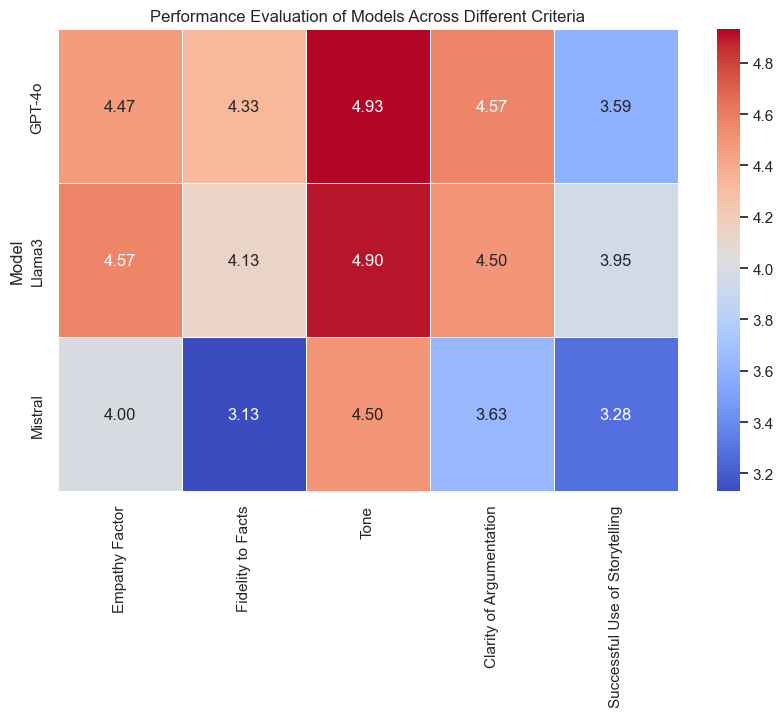

In [19]:
data = {
    'Model': ['GPT-4o', 'Llama3', 'Mistral'],
    'Empathy Factor': [4.47, 4.57, 4.00],
    'Fidelity to Facts': [4.33, 4.13, 3.13],
    'Tone': [4.93, 4.90, 4.50],
    'Clarity of Argumentation': [4.57, 4.50, 3.63],
    'Successful Use of Storytelling': [3.59, 3.95, 3.28]
}
df_meanvalues = pd.DataFrame(data)
df_meanvalues = df_meanvalues.set_index('Model')

plt.figure(figsize=(10, 6))
sns.heatmap(df_meanvalues, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Performance Evaluation of Models Across Different Criteria')
plt.show()

### Statistische Signifikanztests
Die Analyse von Mittelwerten und Standardabweichungen liefert grundlegende Einblicke in die Leistungsfähigkeit der Modelle. Um jedoch fundierte Schlussfolgerungen über die Überlegenheit eines Modells ziehen zu können, reichen diese deskriptiven Statistiken allein nicht aus. Statistische Signifikanztests sind entscheidend, um verlässliche Schlüsse über die Überlegenheit eines Modells zu ziehen.

#### Gepaarte t-Tests zur Bewertung signifikanter Leistungsunterschiede
Der gepaarte t-Test, auch bekannt als t-Test für abhängige Stichproben, prüft die Gleichheit der Mittelwerte zwischen zwei verbundenen Gruppen. Er ist ideal, wenn Messungen unter identischen Bedingungen an denselben Subjekten durchgeführt werden. In dieser Studie vergleichen wir die Bewertungen von drei Modellen, die jeweils Antworten auf denselben Satz von Kommentaren generieren, wodurch eine ideale Anwendungssituation für den gepaarten t-Test entsteht.

### Umstrukturierung der Daten für t-Test
Momentan liegen die Daten in einem Long-Format vor, bei dem jede Zeile eine Bewertung für ein spezifisches Modell und einen bestimmten Kommentar enthält. 

Für die Durchführung gepaarter t-Tests macht es Sinn, die Daten so umzustrukturieren, dass jede Zeile einem `comment_id` entspricht und separate Spalten für jedes Kriterium und Modell vorhanden sind. Wir strukturieren die Daten in ein Wide-Format um und nennen die neue Tabelle 'wide_data'. Mit dieser Tabelle können wir nun einfacher direkte Vergleiche und statistische Tests durchführen. 


In [7]:
# Load the evaluated dataset
data = pd.read_csv('../data/evaluation/counterspeech_90_samples_evaluated.csv', delimiter=';', quotechar='"')

# Pivoting the data to wide format for each comment
# Each combination of model and criterion becomes its own column.
wide_data = data.pivot_table(index='comment_id', columns='model', values=[
    'empathy_factor', 'fidelity_to_facts', 'tone', 'clarity_of_argumentation', 'successful_use_of_storytelling'], aggfunc='mean')

# Flattening the Multi-Index column names
wide_data.columns = ['{}_{}'.format(col[1], col[0]) for col in wide_data.columns.values]

# Resetting the index to use 'comment_id' as a regular column
wide_data.reset_index(inplace=True)

# Displaying the first few rows of the restructured data
wide_data.head(15)

,comment_id,counter_speech_gpt-4o_clarity_of_argumentation,counter_speech_llama3_clarity_of_argumentation,counter_speech_mistral_clarity_of_argumentation,counter_speech_gpt-4o_empathy_factor,counter_speech_llama3_empathy_factor,counter_speech_mistral_empathy_factor,counter_speech_gpt-4o_fidelity_to_facts,counter_speech_llama3_fidelity_to_facts,counter_speech_mistral_fidelity_to_facts,counter_speech_gpt-4o_successful_use_of_storytelling,counter_speech_llama3_successful_use_of_storytelling,counter_speech_mistral_successful_use_of_storytelling,counter_speech_gpt-4o_tone,counter_speech_llama3_tone,counter_speech_mistral_tone
0,6,4.0,5.0,2.0,4.0,5.0,3.0,4.0,3.0,3.0,3.0,4.0,2.0,5.0,5.0,4.0
1,9,5.0,5.0,4.0,4.0,4.0,5.0,4.0,4.0,4.0,3.0,NaN,NaN,5.0,5.0,5.0
2,12,4.0,4.0,3.0,5.0,4.0,4.0,4.0,3.0,3.0,3.0,NaN,3.0,5.0,4.0,5.0
3,15,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0,3.0,4.0,NaN,4.0,5.0,5.0,5.0
4,18,5.0,5.0,1.0,5.0,5.0,3.0,4.0,5.0,2.0,3.0,NaN,2.0,5.0,5.0,3.0
5,21,4.0,5.0,3.0,4.0,4.0,3.0,4.0,5.0,2.0,2.0,NaN,4.0,5.0,5.0,4.0
6,24,5.0,4.0,2.0,5.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,1.0,5.0,4.0,4.0
7,27,5.0,5.0,4.0,5.0,5.0,3.0,5.0,5.0,3.0,5.0,4.0,2.0,5.0,5.0,2.0
8,30,4.0,4.0,4.0,5.0,5.0,4.0,4.0,4.0,3.0,2.0,NaN,NaN,5.0,5.0,5.0
9,33,5.0,4.0,2.0,4.0,5.0,4.0,4.0,3.0,3.0,4.0,3.0,2.0,5.0,5.0,5.0


### Durchführung von gepaarten t-Tests
Für jede Kombination von Modellen und jedes Kriterium wird ein gepaarter t-Test durchgeführt, um signifikante Leistungsunterschiede zu identifizieren. Zusätzlich wird Cohen's d berechnet, um die Effektstärke der beobachteten Unterschiede zu messen.

In [11]:
# Define model names and criteria, excluding "successful_use_of_storytelling"
models = ['counter_speech_gpt-4o', 'counter_speech_llama3', 'counter_speech_mistral']
criteria = ['clarity_of_argumentation', 'empathy_factor', 'fidelity_to_facts', 'tone'] 

# Perform calculations
results = []
for criterion in criteria:
    for i in range(len(models)):
        for j in range(i + 1, len(models)):
            model1_col = f'{models[i]}_{criterion}'
            model2_col = f'{models[j]}_{criterion}'

            # Check if columns exist in the DataFrame and do not contain NaN values
            if model1_col in wide_data.columns and model2_col in wide_data.columns:
                valid_indices = wide_data.dropna(subset=[model1_col, model2_col]).index

                # Perform paired t-Test if valid data is available
                if not valid_indices.empty:
                    t_stat, p_value = ttest_rel(wide_data.loc[valid_indices, model1_col], wide_data.loc[valid_indices, model2_col])
                    
                    # Calculate Cohen's d
                    def cohens_d(x, y):
                        # Calculate the difference between two sets of observations
                        diff = x - y
                        # Calculate mean and standard deviation of the differences
                        mean_diff = np.mean(diff)
                        std_diff = np.std(diff, ddof=1)
                        return mean_diff / std_diff
                    
                    # Apply Cohen's d function to calculate effect size
                    d = cohens_d(wide_data.loc[valid_indices, model1_col], wide_data.loc[valid_indices, model2_col])
                    
                    # Save results
                    results.append({
                        'Criterion': criterion,
                        'Model Comparison': f'{models[i]} vs. {models[j]}',
                        't-value': t_stat,
                        'p-Value': p_value,
                        'Cohen\'s d': d
                    })

# Output results as a DataFrame
results_df = pd.DataFrame(results)

# results_df.to_csv('t-test_results.csv')
results_df.head(15)

,Criterion,Model Comparison,t-value,p-Value,Cohen's d
0,clarity_of_argumentation,counter_speech_gpt-4o vs. counter_speech_llama3,0.493657,6.252664e-01,0.090129
1,clarity_of_argumentation,counter_speech_gpt-4o vs. counter_speech_mistral,4.876723,3.573128e-05,0.890364
2,clarity_of_argumentation,counter_speech_llama3 vs. counter_speech_mistral,4.418812,1.270462e-04,0.806761
3,empathy_factor,counter_speech_gpt-4o vs. counter_speech_llama3,-1.000000,3.255820e-01,-0.182574
4,empathy_factor,counter_speech_gpt-4o vs. counter_speech_mistral,3.119756,4.069703e-03,0.569587
5,empathy_factor,counter_speech_llama3 vs. counter_speech_mistral,3.798043,6.902929e-04,0.693425
6,fidelity_to_facts,counter_speech_gpt-4o vs. counter_speech_llama3,1.184578,2.458020e-01,0.216273
7,fidelity_to_facts,counter_speech_gpt-4o vs. counter_speech_mistral,7.107470,8.053014e-08,1.297641
8,fidelity_to_facts,counter_speech_llama3 vs. counter_speech_mistral,5.214163,1.398714e-05,0.951972
9,tone,counter_speech_gpt-4o vs. counter_speech_llama3,0.372500,7.122294e-01,0.068009


### Korrektur für multiple Tests
In dieser Studie werden mehrere statistische Tests durchgeführt, um die Leistungen von drei Modellen über vier Bewertungskriterien zu vergleichen. Dies erhöht das Risiko einer Alpha-Inflation, bei der das Alpha-Niveau – typischerweise bei 0.05 angesetzt – die Wahrscheinlichkeit angibt, fälschlicherweise eine wahre Nullhypothese abzulehnen (Typ-I-Fehler). 

Wir nutzen für diese Analyse die Holm-Korrektur, die eine ausgeglichene Methode zur Kontrolle von falsch-positiven Ergebnissen bietet und weniger konservativ als Bonferroni ist.

In [14]:
# Apply the Holm method for multiple testing correction
pvals = results_df['p-Value'].values
reject, pvals_corrected, _, _ = smm.multipletests(pvals, alpha=0.05, method='holm', returnsorted=False)

# Add the adjusted P-values and decision on rejecting the null hypothesis to df
results_df['Adjusted p-Value'] = pvals_corrected
results_df['Reject H0'] = reject

# Display the updated table with the corrected P-values and decisions on the hypotheses
results_df.head(20)

,Criterion,Model Comparison,t-value,p-Value,Cohen's d,Adjusted p-Value,Reject H0
0,clarity_of_argumentation,counter_speech_gpt-4o vs. counter_speech_llama3,0.493657,6.252664e-01,0.090129,1.000000e+00,False
1,clarity_of_argumentation,counter_speech_gpt-4o vs. counter_speech_mistral,4.876723,3.573128e-05,0.890364,3.573128e-04,True
2,clarity_of_argumentation,counter_speech_llama3 vs. counter_speech_mistral,4.418812,1.270462e-04,0.806761,1.143415e-03,True
3,empathy_factor,counter_speech_gpt-4o vs. counter_speech_llama3,-1.000000,3.255820e-01,-0.182574,9.832079e-01,False
4,empathy_factor,counter_speech_gpt-4o vs. counter_speech_mistral,3.119756,4.069703e-03,0.569587,2.848792e-02,True
5,empathy_factor,counter_speech_llama3 vs. counter_speech_mistral,3.798043,6.902929e-04,0.693425,5.522343e-03,True
6,fidelity_to_facts,counter_speech_gpt-4o vs. counter_speech_llama3,1.184578,2.458020e-01,0.216273,9.832079e-01,False
7,fidelity_to_facts,counter_speech_gpt-4o vs. counter_speech_mistral,7.107470,8.053014e-08,1.297641,9.663617e-07,True
8,fidelity_to_facts,counter_speech_llama3 vs. counter_speech_mistral,5.214163,1.398714e-05,0.951972,1.538586e-04,True
9,tone,counter_speech_gpt-4o vs. counter_speech_llama3,0.372500,7.122294e-01,0.068009,1.000000e+00,False


### Darstellung der Signifikanz vor und nach der Korrektur
Die folgende Tabelle illustriert die Veränderung der statistischen Signifikanz der Ergebnisse vor und nach der Anwendung der Korrekturverfahren. Sie zeigt sowohl die ursprünglichen als auch die korrigierten P-Werte und dokumentiert die Entscheidungen bezüglich der Ablehnung oder Beibehaltung der Nullhypothese für beide Fälle. Dies ermöglicht einen direkten Vergleich der Auswirkungen der Korrektur auf die statistische Signifikanz der Ergebnisse.

In [17]:
# Add a new column 'Is Significant Before' to indicate if the original p-value is less than 0.05
results_df['Is Significant Before'] = results_df['p-Value'] < 0.05

# Add a new column 'Is Significant After' to indicate if the adjusted p-value is less than 0.05
results_df['Is Significant After'] = results_df['Adjusted p-Value'] < 0.05

# Create a new DataFrame to display relevant columns for comparison
comparison_df = results_df[['Criterion', 'p-Value', 'Adjusted p-Value', 'Is Significant Before', 'Is Significant After']]

# Optionally, save the comparison DataFrame to a CSV file
# comparison_df.to_csv('test_correction_pvalue.csv')

# Display the first 15 rows of the comparison DataFrame
comparison_df.head(15)

,Criterion,p-Value,Adjusted p-Value,Is Significant Before,Is Significant After
0,clarity_of_argumentation,6.252664e-01,1.000000e+00,False,False
1,clarity_of_argumentation,3.573128e-05,3.573128e-04,True,True
2,clarity_of_argumentation,1.270462e-04,1.143415e-03,True,True
3,empathy_factor,3.255820e-01,9.832079e-01,False,False
4,empathy_factor,4.069703e-03,2.848792e-02,True,True
5,empathy_factor,6.902929e-04,5.522343e-03,True,True
6,fidelity_to_facts,2.458020e-01,9.832079e-01,False,False
7,fidelity_to_facts,8.053014e-08,9.663617e-07,True,True
8,fidelity_to_facts,1.398714e-05,1.538586e-04,True,True
9,tone,7.122294e-01,1.000000e+00,False,False


## Erste kurze Interpretation der Ergebnisse (Beispiel)

Analyse der spezifischen Werte
Beispiel Klarheit der Argumentation: GPT-4o vs. Mistral

#### t-Wert: 4.88

Der t-Wert von 4.88 ist relativ hoch, was darauf hinweist, dass der Unterschied zwischen den Mittelwerten von GPT-4o und Mistral deutlich und konsistent ist. Ein höherer t-Wert bedeutet, dass der beobachtete Unterschied weit über das hinausgeht, was unter der Annahme der Nullhypothese (kein Unterschied) zu erwarten wäre.

#### p-Wert: 0.000357

Der p-Wert ist sehr klein (weit unter 0.05), was auf eine sehr starke statistische Signifikanz des Unterschieds hinweist. Ein kleiner p-Wert bedeutet, dass die Wahrscheinlichkeit, solch extreme Ergebnisse zu beobachten, wenn die Nullhypothese wahr wäre, sehr gering ist. In diesem Fall können wir mit hoher Zuversicht sagen, dass der Unterschied zwischen GPT-4o und Mistral in Bezug auf die Klarheit der Argumentation nicht zufällig ist.

#### Cohen's d: 0.89

Cohen's d von 0.89 zeigt einen starken Effekt an. Cohen’s d-Werte können wie folgt interpretiert werden: 0.2 als kleiner Effekt, 0.5 als mittlerer Effekt und 0.8 oder höher als großer Effekt. Ein Wert von 0.89 bedeutet, dass der Unterschied zwischen den beiden Modellen in der Klarheit der Argumentation nicht nur statistisch signifikant, sondern auch praktisch bedeutend ist.

### Liniendiagramm Visualisierung der Effektgrößen (Cohen's d)
Dieses Diagramm zeigt die Effektgrößen (Cohen's d) für verschiedene Modellvergleiche (GPT-4o vs. Llama 3, GPT-4o vs. Mistral, Llama 3 vs. Mistral) über mehrere Bewertungskriterien hinweg. Ein Cohen's d-Wert von 0.8 oder höher wird als starker Effekt betrachtet, was durch die gestrichelte schwarze Linie markiert ist. 

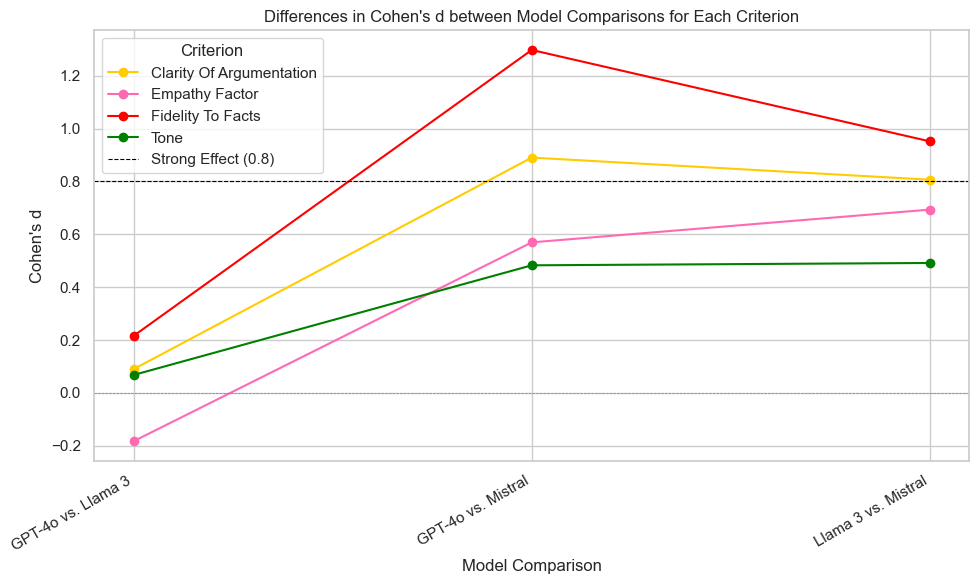

In [20]:
# Create a line plot for Cohen's d between models for each criterion
fig, ax = plt.subplots(figsize=(10, 6))

# Define custom colors: Yellow, Pink, Red, Green
colors = ['#ffcc00', '#ff69b4', '#ff0000', '#008000']  

# Define readable labels for the comparisons
comparison_labels = {
    "counter_speech_gpt-4o vs. counter_speech_llama3": "GPT-4o vs. Llama 3",
    "counter_speech_gpt-4o vs. counter_speech_mistral": "GPT-4o vs. Mistral",
    "counter_speech_llama3 vs. counter_speech_mistral": "Llama 3 vs. Mistral"
}

for criterion, color in zip(criteria, colors):
    subset = results_df[results_df['Criterion'] == criterion]
    comparisons = subset['Model Comparison'].map(comparison_labels)
    cohen_d = subset["Cohen's d"]
    
    line, = ax.plot(comparisons, cohen_d, marker='o', label=criterion)
    line.set_color(color)

ax.set_title("Differences in Cohen's d between Model Comparisons for Each Criterion")
ax.set_xlabel("Model Comparison")
ax.set_ylabel("Cohen's d")
ax.axhline(0, color='grey', linestyle='--', linewidth=0.5)
ax.axhline(0.8, color='black', linestyle='--', linewidth=0.8, label='Strong Effect (0.8)')  # Strong effect size line
plt.xticks(rotation=30, ha='right')

# Remove underscores and capitalize
handles, labels = ax.get_legend_handles_labels()
labels = [label.replace('_', ' ').title() for label in labels]  
ax.legend(handles, labels, title='Criterion')

plt.tight_layout()

# Show plot
plt.show()